# MLPC '20 Project Notebook

In [1]:
from opera_dataset import OperaDataset
from evaluation_runner import EvaluationRunner
from grid_search_wrapper import GridSearchWrapper

from scipy import stats
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import itertools

## 1 Load data

In [2]:
data = OperaDataset(max_files=11)
data.split()

## 2 Analyse the data

### 2.1 How are features correlated with each other or over time?

In [3]:
data.correlation_matrix().head()

,mean_15.10.15_mfcc_0_40,mean_15.10.15_mfcc_1_40,mean_15.10.15_mfcc_2_40,mean_15.10.15_mfcc_3_40,mean_15.10.15_mfcc_4_40,mean_15.10.15_mfcc_5_40,mean_15.10.15_mfcc_6_40,mean_15.10.15_mfcc_7_40,mean_15.10.15_mfcc_8_40,mean_15.10.15_mfcc_9_40,...,range_15.10.15_cent_8_20,range_15.10.15_cent_9_20,range_15.10.15_cent_10_20,range_15.10.15_cent_11_20,range_15.10.15_cent_12_20,range_15.10.15_cent_13_20,range_15.10.15_cent_14_20,range_15.10.15_cent_15_20,range_15.10.15_cent_16_20,range_15.10.15_cent_17_20
mean_15.10.15_mfcc_0_40,1.000000,-0.102440,-0.539891,-0.081697,-0.153119,-0.217704,-0.129835,0.081068,-0.122725,-0.032958,...,-0.018260,-0.020429,-0.052532,-0.071946,-0.085216,-0.120837,-0.110225,-0.061024,-0.016141,0.022222
mean_15.10.15_mfcc_1_40,-0.102440,1.000000,0.283985,0.096124,0.081484,0.126586,-0.023086,-0.112648,0.040013,-0.138650,...,-0.188966,-0.210358,-0.206938,-0.175461,-0.151772,-0.176006,-0.192337,-0.192276,-0.200273,-0.218646
mean_15.10.15_mfcc_2_40,-0.539891,0.283985,1.000000,0.402422,0.124847,0.490499,0.200287,-0.130951,0.213957,-0.009602,...,-0.151263,-0.126996,-0.087729,-0.055035,-0.023964,0.051810,0.114851,0.097003,0.028814,-0.069353
mean_15.10.15_mfcc_3_40,-0.081697,0.096124,0.402422,1.000000,0.278913,0.268065,0.241145,-0.114710,0.198756,0.129549,...,-0.076997,-0.045178,-0.059289,-0.104259,-0.139672,-0.121022,-0.088891,-0.101244,-0.147225,-0.150098
mean_15.10.15_mfcc_4_40,-0.153119,0.081484,0.124847,0.278913,1.000000,0.275478,-0.351294,0.113520,0.101285,-0.135330,...,0.272430,0.184660,0.023912,-0.114687,-0.146317,-0.047478,0.115477,0.205771,0.223984,0.145747


### 2.2 Do any features seem redundant?

In [4]:
# TODO

### 2.3 Which features correlate with the labels?

In [5]:
corr_matrix = data.correlation_matrix('choral')
corr_matrix[abs(corr_matrix) > 0.5]

choral    1.0
Name: choral, dtype: float64

In [6]:
corr_matrix = data.correlation_matrix('female')
corr_matrix[abs(corr_matrix) > 0.5]

female                      1.000000
mean_15.10.15_cont_14_20    0.542872
mean_15.10.15_cont_17_20   -0.513996
Name: female, dtype: float64

In [7]:
corr_matrix = data.correlation_matrix('male')
corr_matrix[abs(corr_matrix) > 0.5]

male                        1.000000
mean_15.10.15_cont_13_20    0.562378
mean_15.10.15_cent_15_20   -0.608077
mean_15.10.15_cont_15_20   -0.646953
Name: male, dtype: float64

### 2.4 Are there any outliers (in terms of features, or recordings)?

In [8]:
z = np.abs(stats.zscore(data.features()))
rows, columns = np.where(z > 3)
np.unique(rows)

# TODO: maybe remove those instances

array([     0,      1,      2, ..., 106464, 106465, 106466], dtype=int64)

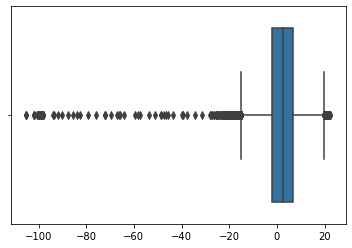

In [9]:
sns.boxplot(x=data.columns(data.feature_names[0]))

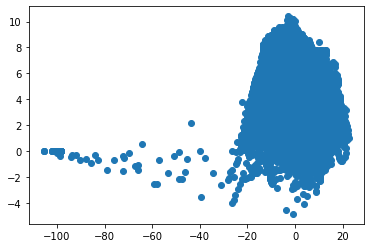

In [10]:
plt.scatter(data.columns(data.feature_names[0]), data.columns(data.feature_names[1]))

In [11]:
def pca(X, y, n_components, plot=True):
    pca = PCA(n_components=n_components)
    y_pca = pca.fit_transform(X)

    if plot:
        classes = list(set(y))

        colors = sns.color_palette(n_colors=len(classes)).as_hex()

        width = 14
        cols = 4
        rows = np.math.ceil(np.sum([i for i in range(n_components)]) / cols)
        fig, axs = plt.subplots(rows, cols, figsize=(width, rows * width / cols))

        for i, (pc_1, pc_2) in enumerate(itertools.combinations(range(n_components), 2)):
            for index, c in enumerate(classes):
                ax = axs[int(i / cols), int(i % cols)]
                ax.scatter(y_pca[y==c, pc_1], y_pca[y==c, pc_2], color=colors[index], label=c, s=3)

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels)
        fig.suptitle('Downprojected data')

        plt.show()

    return pca

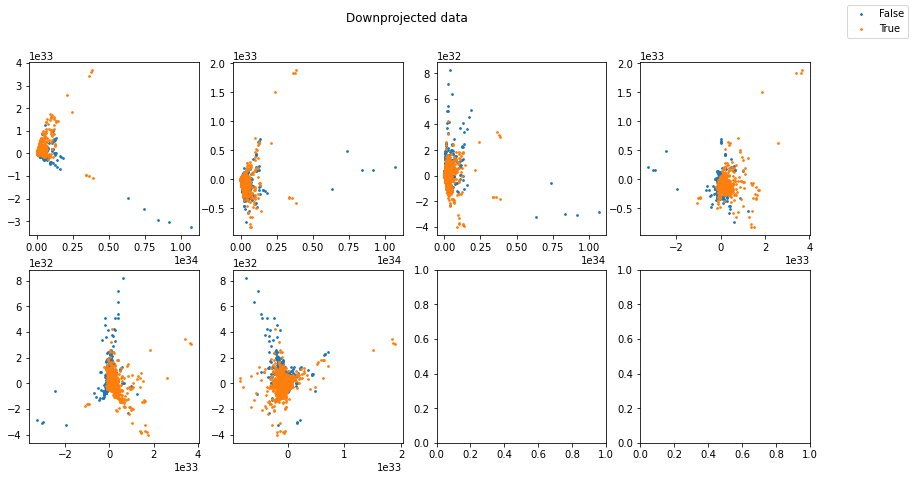

Explained variance: [0.68742866 0.90995108 0.96275893 0.97704182]


In [12]:
p = pca(data.features(), data.labels('male').iloc[:, 0].values, 4)
print(f'Explained variance: {p.explained_variance_ratio_.cumsum()}')

### 2.5 Any other interesting observations?

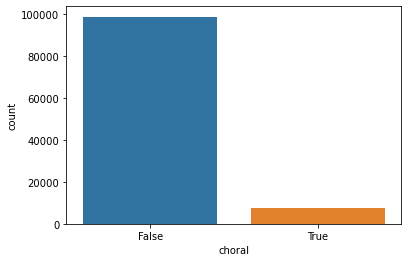

In [13]:
sns.countplot(x = 'choral', data=data.data)

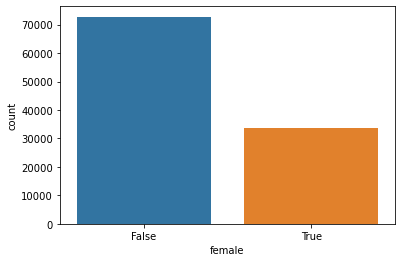

In [14]:
sns.countplot(x = 'female', data=data.data)

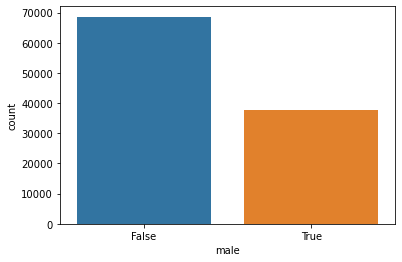

In [15]:
sns.countplot(x = 'male', data=data.data)

### 2.6 Optional: Any correspondence to metadata?

In [16]:
# TODO

### 2.7 Optional: What about multiple annotations?

In [17]:
# TODO

## 3 Train and evaluate classifiers
Perform systematic experiments, using cross-validation, with at least 4 different learning algorithms (suggestion: one from each major group: Support Vector Machines, Neural Networks, Nearest Neighbor Classifiers, Naive Bayes, Decision Trees, Generalized Linear Models, Linear and Quadratic Discriminant Analysis, etc.; perhaps also an “ensemble method” such as Random Forest). Focus on framewise classification accuracy as the evaluation criterion.

For each algorithm: perform a systematic evaluation of different parameter settings, for those parameters that control the algorithm’s overfitting behaviour. Analyse and document how the parameters affect the learned models, and whether overfitting occurs, and to what extent.

In [18]:
folds_choral = data.generate_folds('choral', sampling='up')
folds_female = data.generate_folds('female')
folds_male = data.generate_folds('male')

Generating 5 folds out of data from 5 performances.
Generating 5 folds out of data from 5 performances.
Generating 5 folds out of data from 5 performances.


In [19]:
runner = EvaluationRunner({'lr': LogisticRegression()})
runner.cross_validate(folds_choral, scaler=StandardScaler(), projector=PCA(n_components=40))

Evaluating lr


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/mnt/c/Users/paulg/OneDrive/JKU/6. Semester/Machine Learning and Pattern Classification/Project/evaluation_runner.py:87: RuntimeWarning: invalid value encountered in true_divide
  fpr = fp / float(fp + tn)
/home/paulg/.local/lib/python3.6/site-p

,accuracy,auc_score,fnr,fold,fpr,fprs,name,tprs
0,0.857887,0.938065,0.144857,0,0.114650,"[0.0, 0.0, 0.0006362672322375398, 0.0006362672...",lr,"[0.0, 0.021231422505307854, 0.0212314225053078..."
1,0.650330,0.802257,0.458419,1,0.111422,"[0.0, 9.818360333824252e-05, 0.000392734413352...",lr,"[0.0, 0.0, 0.0, 0.0019359001935900194, 0.00193..."
2,0.743694,0.758676,0.240671,2,0.281964,"[0.0, 0.00046904315196998124, 0.00349176568688...",lr,"[0.0, 0.0, 0.0, 0.0010262550243735568, 0.00102..."
3,0.500778,0.836987,0.024158,3,0.679376,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",lr,"[0.0, 0.00026554547466253595, 0.00046470458065..."
4,0.695286,NaN,0.304714,4,NaN,"[0.0, 0.00015304560759106213, 1.0]",lr,"[nan, nan, nan]"


In [3]:
X, y, cv = data.generate_folds('choral', sampling='up')

In [4]:
runner = EvaluationRunner({'lr': LogisticRegression()})
runner.cross_validate(X.values, y.values, cv, scaler=StandardScaler(), projector=PCA(n_components=40))

Evaluating lr


C:\Users\paulg\OneDrive\JKU\6. Semester\Machine Learning and Pattern Classification\Project\evaluation_runner.py:61: RuntimeWarning: invalid value encountered in true_divide
  fpr = fp / float(fp + tn)
c:\users\paulg\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


,accuracy,fpr,fnr,auc_score,fprs,tprs,name,fold
0,0.857887,0.114650,0.144857,0.938065,"[0.0, 0.0, 0.0006362672322375398, 0.0006362672...","[0.0, 0.021231422505307854, 0.0212314225053078...",lr,0
1,0.650330,0.111422,0.458419,0.802257,"[0.0, 9.818360333824252e-05, 0.000392734413352...","[0.0, 0.0, 0.0, 0.0019359001935900194, 0.00193...",lr,1
2,0.743694,0.281964,0.240671,0.758676,"[0.0, 0.00046904315196998124, 0.00349176568688...","[0.0, 0.0, 0.0, 0.0010262550243735568, 0.00102...",lr,2
3,0.500778,0.679376,0.024158,0.836987,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00026554547466253595, 0.00046470458065...",lr,3
4,0.695286,NaN,0.304714,NaN,"[0.0, 0.00015304560759106213, 1.0]","[nan, nan, nan]",lr,4


Model with rank: 1
Mean validation score: 0.734 (std: 0.095)
Parameters: {'classifier__C': 1.0, 'classifier__l1_ratio': 0.0}

Model with rank: 2
Mean validation score: 0.731 (std: 0.095)
Parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 1.0}

Model with rank: 3
Mean validation score: 0.730 (std: 0.095)
Parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.0}



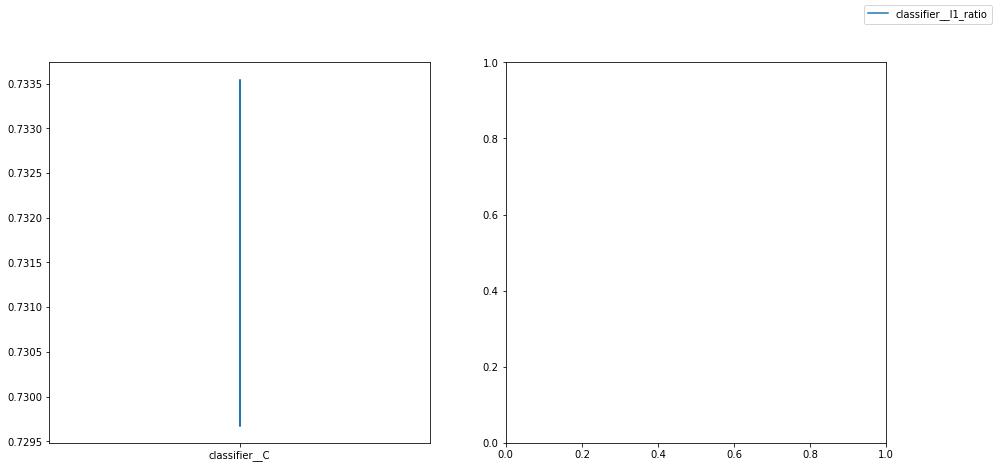

GridSearchCV(cv=[(array([     0,      1,      2, ..., 124945, 124946, 124947]),
                  array([ 46510,  46511,  46512, ..., 124709, 124752, 124872])),
                 (array([     0,      1,      2, ..., 124945, 124946, 124947]),
                  array([ 36325,  36326,  36327, ..., 124898, 124930, 124934])),
                 (array([ 19188,  19189,  19190, ..., 124945, 124946, 124947]),
                  array([     0,      1,      2, ..., 124928, 124937, 124941])),
                 (array([     0,      1,      2, ..., 124934, 124937, 124941]),
                  array([ 191...
                                                           max_iter=500,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='elasticnet',
                                                           random_state=None,
                     

In [20]:
clf = LogisticRegression(max_iter=500, class_weight='balanced', penalty='elasticnet', solver='saga')
grid_search = GridSearchWrapper(clf, StandardScaler(), PCA(n_components=50))
param_grid = {'l1_ratio': np.linspace(0, 1, num=2), 'C': np.power(10, np.arange(-2, 1, dtype=float))}
grid_search.fit(X, y, param_grid, cv)